In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


###**Observation of `df.head()`**

*    **Purpose:** Display the first five rows for an initial visual inspection.

*    **Factual findings:** The columns appear consistent with the dataset description. Columns such as `experience_level` contain abbreviations (e.g., `SE`, `MI`), and `salary_in_usd` contains numeric values. Overall data formats appear reasonable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


###**Observation of `df.info()`**

* **Purpose:** Obtain a technical summary of the DataFrame structure.
* **Factual findings:**
    * **Number of entries:** `[Fill in the number of rows from the `df.info()` output]`

    * **Number of columns:** `[Fill in the number of columns from the `df.info()` output]`

    * **Missing values:** No null values detected (the `Non-Null Count` is identical across all columns).

    * **Data types:** There are `[Fill in the count of `int64` types]` numeric columns (`int64`) and `[Fill in the count of `object` types]` text columns (`object`).
        

In [21]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


###**Observation of `df.isnull().sum()`:**

* **Purpose:** Explicitly confirm the count of missing values per column.

* **Factual findings:** All columns report **0** missing values, which corroborates the `df.info()` result that the dataset contains no missing values.

In [22]:
df.shape

(3755, 11)

###**Observation of `df.shape`**

* **Purpose:** Obtain the exact dimensions of the DataFrame (rows and columns).

* **Factual findings:** This dataset contains **3,755** rows and **11** columns.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


<Axes: xlabel='experience_level', ylabel='count'>

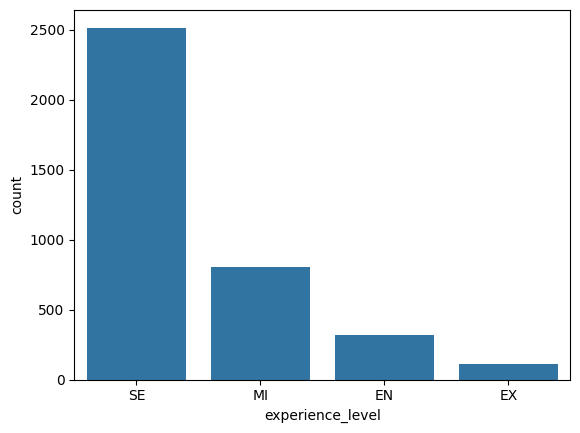

In [24]:
sns.countplot(data=df, x='experience_level')

<Axes: xlabel='salary_in_usd', ylabel='Count'>

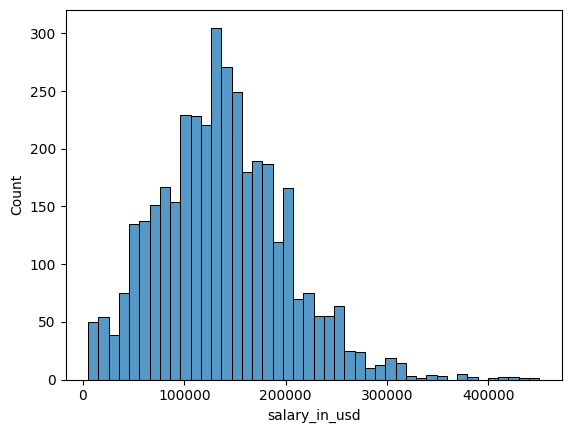

In [25]:
sns.histplot(data=df, x='salary_in_usd')

In [26]:
gaji_per_level = (df
                 . groupby('experience_level')
                 . agg(gaji_rata_rata=('salary_in_usd', 'mean'))
                 . sort_values(by='gaji_rata_rata', ascending=False)
                 . reset_index()
                 )

gaji_per_level


,experience_level,gaji_rata_rata
0,EX,194930.929825
1,SE,153051.071542
2,MI,104525.939130
3,EN,78546.284375


In [27]:
job_gaji_tertinggi = (df
                      .groupby('job_title')
                      .agg(gaji_rata_rata=('salary_in_usd', 'mean'))
                      .sort_values(by='gaji_rata_rata', ascending=False)
                      .reset_index()
                      )
job_gaji_tertinggi.head(10)

,job_title,gaji_rata_rata
0,Data Science Tech Lead,375000.000000
1,Cloud Data Architect,250000.000000
2,Data Lead,212500.000000
3,Data Analytics Lead,211254.500000
4,Principal Data Scientist,198171.125000
5,Director of Data Science,195140.727273
6,Principal Data Engineer,192500.000000
7,Machine Learning Software Engineer,192420.000000
8,Data Science Manager,191278.775862
9,Applied Scientist,190264.482759


In [28]:
gaji_per_level = (df
                         .groupby('experience_level')
                         .agg(
                             gaji_rata_rata=('salary_in_usd', 'mean')
                             , gaji_median=('salary_in_usd', 'median')
                             , gaji_max=('salary_in_usd', 'max')
                             , gaji_min=('salary_in_usd', 'min')
                             )
                          .sort_values(
                              by=['gaji_rata_rata', 'gaji_median', 'gaji_max', 'gaji_min']
                              , ascending=[False,False,False,False]
                                      )
                         .reset_index()
                         )
gaji_per_level


,experience_level,gaji_rata_rata,gaji_median,gaji_max,gaji_min
0,EX,194930.929825,196000.0,416000,15000
1,SE,153051.071542,146000.0,423834,8000
2,MI,104525.939130,100000.0,450000,5132
3,EN,78546.284375,70000.0,300000,5409


In [29]:
df.value_counts('job_title')

,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
...,...
Power BI Developer,1
Product Data Scientist,1
Principal Machine Learning Engineer,1


In [30]:
data_analyst = df[df['job_title'] == 'Data Analyst']

gaji_analyst = (data_analyst
                .groupby('experience_level')
                .agg(gaji_rata_rata=('salary_in_usd', 'mean'))
                .sort_values(by='gaji_rata_rata', ascending=False)
                .reset_index()
)

gaji_analyst

,experience_level,gaji_rata_rata
0,EX,120000.000000
1,SE,119930.215789
2,MI,101516.622754
3,EN,59802.746032


In [31]:
us_gb = df[(df['company_location'] == 'US' )| (df['company_location'] == 'GB')]

gaji_us_gb = (us_gb
              .groupby('company_location')
              .agg(gaji_rata_rata=('salary_in_usd', 'mean'))
              .sort_values(by='gaji_rata_rata', ascending=False)
              .reset_index()
)

gaji_us_gb

,company_location,gaji_rata_rata
0,US,151822.009539
1,GB,86890.052326


In [32]:
data_analyst = df[df['job_title'].isin(['Data Analyst'])]

da_us_gb = data_analyst[data_analyst['company_location'].isin(['US','GB'])]

gaji_da_us_gb = (da_us_gb
                 .groupby('company_location')
                 .agg(gaji_rata_rata=('salary_in_usd', 'mean'))
                 .sort_values(by='gaji_rata_rata', ascending=False)
                 .reset_index()
)

gaji_da_us_gb

,company_location,gaji_rata_rata
0,US,116656.982857
1,GB,78266.560000


In [33]:
df.to_csv('salaries_data_clean_for_tableau', index=False)